In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('data/revdata.csv')
df['datadate'] = pd.to_datetime(df['datadate'], format='%m/%d/%Y')
df = df.fillna(0)
df = df.replace(np.nan,0)

In [ ]:
df

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,lct,lo,lt,mibn,ppent,pstk,revt,teq,txditc,costat
0,1690,2010-09-30,2010,INDL,C,D,STD,AAPL,APPLE INC,USD,...,20722.000,2370.000,27392.000,0.0,4768.000,0.0,65225.000,47791.000,4300.0,A
1,1690,2011-09-30,2011,INDL,C,D,STD,AAPL,APPLE INC,USD,...,27970.000,3627.000,39756.000,0.0,7777.000,0.0,108249.000,76615.000,8159.0,A
2,1690,2012-09-30,2012,INDL,C,D,STD,AAPL,APPLE INC,USD,...,38542.000,5465.000,57854.000,0.0,15452.000,0.0,156508.000,118210.000,13847.0,A
3,1690,2013-09-30,2013,INDL,C,D,STD,AAPL,APPLE INC,USD,...,43658.000,6344.000,83451.000,0.0,16597.000,0.0,170910.000,123549.000,16489.0,A
4,1690,2014-09-30,2014,INDL,C,D,STD,AAPL,APPLE INC,USD,...,63448.000,7598.000,120292.000,0.0,20624.000,0.0,182795.000,111547.000,20259.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,147579,2018-12-31,2018,INDL,C,D,STD,NFLX,NETFLIX INC,USD,...,6487.320,3888.257,20735.635,0.0,418.281,0.0,15794.341,5238.765,0.0,A
204,147579,2019-12-31,2019,INDL,C,D,STD,NFLX,NETFLIX INC,USD,...,6855.696,3355.987,26393.555,0.0,2097.221,0.0,20156.447,7582.157,0.0,A
205,147579,2020-12-31,2020,INDL,C,D,STD,NFLX,NETFLIX INC,USD,...,7805.785,2654.608,28215.119,0.0,2997.909,0.0,24996.056,11065.240,0.0,A
206,147579,2021-12-31,2021,INDL,C,D,STD,NFLX,NETFLIX INC,USD,...,8488.966,3144.891,28735.415,0.0,3770.026,0.0,29697.844,15849.248,0.0,A


In [ ]:
# using a subset for the case of testing
# df = df.loc[df['tic'].isin(['AAPL', 'VZ', 'BA', 'KO', 'XOM', 'MCD'])]

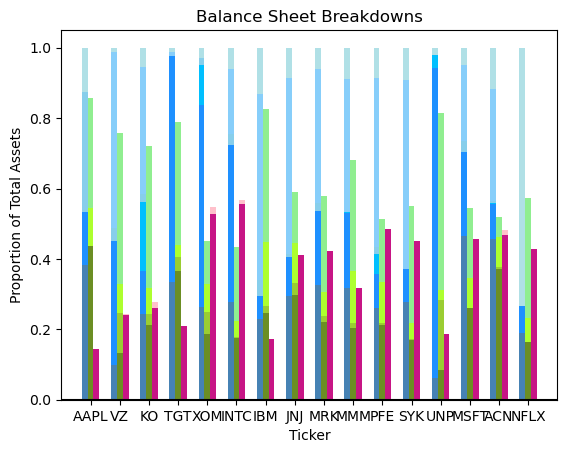

In [ ]:
grouped = df.groupby('tic')
x = list(df.tic.unique())
x_axis = np.arange(len(x))
plt.xlim(min(x_axis)-1, max(x_axis)+1)

for tic, group in grouped:  
    # finding the last row for a given company and getting its position for graphing
    idx = x.index(tic)
    final = group.iloc[-1]
    
    # asset calc
    act = final['act'] / final['at']
    ppent = final['ppent'] / final['at']
    ivaeq = final['ivaeq'] / final['at']
    ivao = final['ivao'] / final['at']
    intan = final['intan'] / final['at']
    ao = final['ao'] / final['at']
    #print(act, ppent, ivaeq, ivao, intan, ao)
    
    # liability calc
    lct = final['lct'] / final['at']
    txditc = final['txditc'] / final['at']
    lo = final['lo'] / final['at']
    dltt = final['dltt'] / final['at']
    #print(lct,txditc,lo,dltt)
    
    # equity calc
    ceq = final['ceq'] / final['at']
    pstk = final['pstk'] / final['at']
    mibn = final['mibn'] / final['at']
    #print(ceq, pstk, mibn)
    
    act, ppent, ivaeq, ivao, intan, ao = [np.array(var) if var!=np.nan else np.array(0) for var in [act, ppent, ivaeq, ivao, intan, ao]]

    # assets graphing
    plt.bar(x_axis[idx]-0.2, act, 0.2, color='steelblue')
    plt.bar(x_axis[idx]-0.2, ppent, 0.2, bottom=act, color='dodgerblue')
    plt.bar(x_axis[idx]-0.2, ivaeq, 0.2, bottom=act+ppent, color='deepskyblue')
    plt.bar(x_axis[idx]-0.2, ivao, 0.2, bottom=act+ppent+ivaeq, color='skyblue')
    plt.bar(x_axis[idx]-0.2, intan, 0.2, bottom=act+ppent+ivaeq+ivao, color='lightskyblue')
    plt.bar(x_axis[idx]-0.2, ao, 0.2, bottom=act+ppent+ivaeq+ivao+intan, color='powderblue')

    # liabilities graphing
    plt.bar(x_axis[idx], lct, 0.2, color='olivedrab')
    plt.bar(x_axis[idx], txditc, 0.2, bottom=lct, color='yellowgreen')
    plt.bar(x_axis[idx], lo, 0.2, bottom=lct+txditc, color='greenyellow')
    plt.bar(x_axis[idx], dltt, 0.2, bottom=lct+txditc+lo, color='lightgreen')

    # equities graphing
    plt.bar(x_axis[idx]+0.2, ceq, 0.2, color='mediumvioletred')
    plt.bar(x_axis[idx]+0.2, pstk, 0.2, bottom=ceq, color='hotpink')
    plt.bar(x_axis[idx]+0.2, mibn, 0.2, bottom=ceq+pstk, color='pink')

# plotting basics 
plt.xticks(x_axis, x)
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.xlabel('Ticker')
plt.xticks(rotation = 45)
plt.ylabel('Proportion of Total Assets')
plt.title('Balance Sheet Breakdowns')
plt.show()

In [ ]:
df['plot_act'] = df['act'] / df['at']
df['plot_ppent'] = df['ppent'] / df['at']
df['plot_ivaeq'] = df['ivaeq'] / df['at']
df['plot_ivao'] = df['ivao'] / df['at']
df['plot_intan'] = df['intan'] / df['at']
df['plot_ao'] = df['ao'] / df['at']
#print(act, ppent, ivaeq, ivao, intan, ao)

# liability calc
df['plot_lct'] = df['lct'] / df['at']
df['plot_txditc'] = df['txditc'] / df['at']
df['plot_lo'] = df['lo'] / df['at']
df['plot_dltt'] = df['dltt'] / df['at']
#print(lct,txditc,lo,dltt)

# equity calc
df['plot_ceq'] = df['ceq'] / df['at']
df['plot_pstk'] = df['pstk'] / df['at']
df['plot_mibn'] = df['mibn'] / df['at']

In [ ]:
df

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,plot_ivao,plot_intan,plot_ao,plot_lct,plot_txditc,plot_lo,plot_dltt,plot_ceq,plot_pstk,plot_mibn
0,1690,2010-09-30,2010,INDL,C,D,STD,AAPL,APPLE INC,USD,...,0.337723,0.014405,0.030100,0.275621,0.057194,0.031523,0.000000,0.635662,0.0,0.0
1,1690,2011-09-30,2011,INDL,C,D,STD,AAPL,APPLE INC,USD,...,0.477937,0.038085,0.030557,0.240352,0.070112,0.031168,0.000000,0.658368,0.0,0.0
2,1690,2012-09-30,2012,INDL,C,D,STD,AAPL,APPLE INC,USD,...,0.523230,0.030438,0.031114,0.218909,0.078648,0.031040,0.000000,0.671404,0.0,0.0
3,1690,2013-09-30,2013,INDL,C,D,STD,AAPL,APPLE INC,USD,...,0.513116,0.027807,0.024860,0.210908,0.079657,0.030647,0.081932,0.596855,0.0,0.0
4,1690,2014-09-30,2014,INDL,C,D,STD,AAPL,APPLE INC,USD,...,0.561433,0.037776,0.016235,0.273673,0.087384,0.032773,0.125031,0.481140,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,147579,2018-12-31,2018,INDL,C,D,STD,NFLX,NETFLIX INC,USD,...,0.000050,0.000000,0.610628,0.249758,0.000000,0.149696,0.398856,0.201690,0.0,0.0
204,147579,2019-12-31,2019,INDL,C,D,STD,NFLX,NETFLIX INC,USD,...,0.000039,0.000000,0.756383,0.201782,0.000000,0.098776,0.476278,0.223164,0.0,0.0
205,147579,2020-12-31,2020,INDL,C,D,STD,NFLX,NETFLIX INC,USD,...,0.000006,0.000000,0.675162,0.198720,0.000000,0.067581,0.452000,0.281699,0.0,0.0
206,147579,2021-12-31,2021,INDL,C,D,STD,NFLX,NETFLIX INC,USD,...,0.000003,0.000000,0.734438,0.190401,0.000000,0.070538,0.383575,0.355487,0.0,0.0


In [ ]:
df.to_csv('data/revdata.csv', index=False)